In [3]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz # needed to visualize trained decision tree
from sklearn.tree import export_graphviz # needed to visualize trained decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pickle

/Users/jacksonschreyer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jacksonschreyer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/5y/cpywppss60x1dr370krrclx40000gn/T/ipykernel_50818/977836562.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/5446

In [4]:
from IPython.display import Javascript

Javascript('alert("This notebook is trusted!")')

<IPython.core.display.Javascript object>

In [5]:
# Assuming your 'Species.csv' file is properly formatted
ACT_new_species_Future = pd.read_csv("species_ACT_Scenerio_1.csv")

# Select the 'Occurrence' column
# Occurrence = Species['Occurrence']

# Drop rows with NaN values in 'Category', 'Order', 'Family', and 'Occurrence'
ACT_new_species_Future_cleaned = ACT_new_species_Future.dropna(subset=['Category', 'Order', 'Family', 'Occurrence'])
ACT_new_species_Future_cleaned = ACT_new_species_Future_cleaned[~ACT_new_species_Future_cleaned['Occurrence'].isin(['Approved', 'In Review'])] 
# Display the new cleaned dataset
# print(ACT_new_species_Future_cleaned)

# List of columns to keep
columns_to_keep = ["Category", "Order", "Family", "Future_Max", "Future_Min", "Future_Pricip"]

# Create a new DataFrame with the selected columns
ACT_inputs_Future = ACT_new_species_Future_cleaned[columns_to_keep].copy()

# One-hot encode the specified columns
ACT_inputs_Future_encoded = pd.get_dummies(ACT_inputs_Future, columns=['Family', 'Category', 'Order'])

# Create a mapping dictionary for renaming so orginal model can use it 
rename_mapping = {
    'Future_Max': 'Max_Month_Av',
    'Future_Min': 'Min_Month_AV',
    'Future_Pricip': 'Annual_Precipitation'
}

# Rename the columns in your new data
ACT_inputs_Future_encoded.rename(columns=rename_mapping, inplace=True)
# Assuming you already have ACT_inputs_Future_encoded prepared
# Display the new DataFrame with one-hot encoding
#print(ACT_inputs_Future_encoded)

In [6]:
# Create a copy of the DataFrame
ACT_new_species_Future_cleaned_copy = ACT_new_species_Future_cleaned.copy()

# Create a new 'Grouped_Occurrence' column based on 'Occurrence'
ACT_new_species_Future_cleaned_copy['Grouped_Occurrence'] = ACT_new_species_Future_cleaned_copy['Occurrence'].apply(lambda x: 'Not Present' if x != 'Present' else 'Present')

In [7]:
# Load the saved model using pickle
with open('random_forest_model_grouped_occurrence2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict on the new data
predictions_future = loaded_model.predict(ACT_inputs_Future_encoded)

#Results made into a data frame
result_df = pd.DataFrame({
    'Species ID': ACT_new_species_Future_cleaned_copy['Species ID'],
    'Park Name': ACT_new_species_Future_cleaned_copy['Park Name'],
    'Category': ACT_new_species_Future_cleaned_copy['Category'],
    'Order': ACT_new_species_Future_cleaned_copy['Order'],
    'Family': ACT_new_species_Future_cleaned_copy['Family'],
    'Scientific Name': ACT_new_species_Future_cleaned_copy['Scientific Name'],
    'Common Names': ACT_new_species_Future_cleaned_copy['Common Names'],
    'Record Status': ACT_new_species_Future_cleaned_copy['Record Status'],
    'Occurrence': ACT_new_species_Future_cleaned_copy['Occurrence'],
    'Nativeness': ACT_new_species_Future_cleaned_copy['Nativeness'],
    'Abundance': ACT_new_species_Future_cleaned_copy['Abundance'],
    'Seasonality': ACT_new_species_Future_cleaned_copy['Seasonality'],
    'Conservation Status': ACT_new_species_Future_cleaned_copy['Conservation Status'],
    'Grouped_Occurrence': ACT_new_species_Future_cleaned_copy['Grouped_Occurrence'],
    'Prediction': predictions_future
})
# Print or use the result DataFrame as needed
#print(result_df)
# Filter the DataFrame
# Print or use the filtered DataFrame as needed
#print(filtered_df)
#print(filtered_df.head())
#print(result_df)

In [8]:
# List of national parks in Alaska
alaska_and_hawaii_parks = [
    'Denali National Park and Preserve',
    'Gates Of The Arctic National Park and Preserve',
    'Glacier Bay National Park and Preserve',
    'Katmai National Park and Preserve',
    'Kenai Fjords National Park',
    'Kobuk Valley National Park',
    'Lake Clark National Park and Preserve',
    'Wrangell - St Elias National Park and Preserve',
    "Hawaii Volcanoes National Park",
    "Haleakala National Park",
]
# Filter out rows corresponding to national parks in Alaska
result_df_without_alaska_and_hawaii = result_df[~result_df['Park Name'].isin(alaska_and_hawaii_parks)]

# Print or use the filtered DataFrame as needed
#print(result_df_without_alaska_and_hawaii)

In [9]:
# Print or use the result DataFrame as needed
#print(result_df)
# Filter the DataFrame to create to datframes for Changes in species occurrence
filtered_df_present_to_not_present = result_df_without_alaska_and_hawaii[(result_df_without_alaska_and_hawaii['Grouped_Occurrence'] == 'Present') & (result_df_without_alaska_and_hawaii['Prediction'] == 'Not Present')]
filtered_df_not_present_to_present = result_df_without_alaska_and_hawaii[(result_df_without_alaska_and_hawaii['Grouped_Occurrence'] == 'Not Present') & (result_df_without_alaska_and_hawaii['Prediction'] == 'Present')]
unique_park_names_count = result_df_without_alaska_and_hawaii['Park Name'].nunique()
print(unique_park_names_count)

46


In [10]:
# Assuming the CSV file is in the same directory as your script or notebook
file_path = "parks.csv"

# Read the CSV file into a DataFrame
park_df = pd.read_csv(file_path)

In [11]:
import pandas as pd

# Assuming result_df_without_alaska_and_hawaii is your DataFrame
# Replace 'Grouped_Occurrence' and 'Prediction' with your actual column names

# Create a new DataFrame with selected columns
Grouped_park_prediction = result_df_without_alaska_and_hawaii[['Park Name', 'Grouped_Occurrence', 'Prediction']]

# Print or use the resulting DataFrame as needed
#print(Grouped_park_prediction)

# Calculate the total number of "Present" for Grouped_Occurrence and Prediction for each park
grouped_occurrence_counts = result_df_without_alaska_and_hawaii[result_df_without_alaska_and_hawaii['Grouped_Occurrence'] == 'Present'].groupby('Park Name').size()
prediction_counts = result_df_without_alaska_and_hawaii[result_df_without_alaska_and_hawaii['Prediction'] == 'Present'].groupby('Park Name').size()

# Create a DataFrame with Park Name, Grouped_Occurrence Present count, Prediction Present count
present_counts_df = pd.DataFrame({
    'Park Name': grouped_occurrence_counts.index,
    'Grouped_Occurrence_Present_Count': grouped_occurrence_counts.values,
    'Prediction_Present_Count': prediction_counts.values
})

# Fill NaN values with 0 in case there are parks with no occurrences
present_counts_df = present_counts_df.fillna(0)

# Calculate the difference between Prediction and Grouped_Occurrence
present_counts_df['Difference'] = present_counts_df['Prediction_Present_Count'] - present_counts_df['Grouped_Occurrence_Present_Count']

# Display the resulting DataFrame
#print(present_counts_df)
#Merge present_counts_df with Park_data based on 'Park Name' and 'State'
Present_counts_df_with_locations = pd.merge(present_counts_df, park_df[['Park Name','Latitude', 'Longitude']], on=['Park Name'], how='left')

# Display the resulting DataFrame
#print(Present_counts_df_with_locations)

In [12]:
# Load park data from park.csv
park_data = pd.read_csv('parks.csv')
import folium

# Create a map centered at an arbitrary location (e.g., the United States)
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Define color scale and ranges
color_scale = {
    'red': (-float('inf'), 0),
    'orange': (0, 100),
    'blue': (100, 250),
    'lightgreen': (250, 400),
    'darkgreen': (400, float('inf'))
}

# Add legend to the map
legend_title = 'Difference in Occurrences between 2016 and 2081-2100'

legend_html = '''
    <div style="position: fixed; bottom: 50px; left: 50px; width: 180px; background-color: white; border-radius: 5px; z-index:1000; font-size:14px;">
    <div style="padding: 10px; text-align: center; font-weight: bold;">{}</div>
    <div style="padding: 5px;">
    <span style="color: red; font-size: 30px; margin-right: 5px; vertical-align: middle;">&bull;</span> Negative<br>
    <span style="color: orange; font-size: 30px; margin-right: 5px; vertical-align: middle;">&bull;</span> 0 to 100<br>
    <span style="color: blue; font-size: 30px; margin-right: 5px; vertical-align: middle;">&bull;</span> 100 to 250<br>
    <span style="color: lightgreen; font-size: 30px; margin-right: 5px; vertical-align: middle;">&bull;</span> 250 to 400<br>
    <span style="color: darkgreen; font-size: 30px; margin-right: 5px; vertical-align: middle;">&bull;</span> 400+
    </div>
    </div>
'''.format(legend_title)

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Iterate over rows in the DataFrame and add a marker for each park
for index, row in Present_counts_df_with_locations.iterrows():
    park_name = row['Park Name']
    latitude = row['Latitude']
    longitude = row['Longitude']
    difference = row['Difference']

    # Determine marker color based on the 'Difference' value and color scale
    color = 'red'  # Default color
    for c, (lower, upper) in color_scale.items():
        if lower <= difference < upper:
            color = c
            break

    # Add a marker for each park with a popup displaying park information
    folium.Marker(
        location=[latitude, longitude],
        popup=f"{park_name}<br>Difference in Present Occurrences: {difference}",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Display the map
#m.save('Map with changing Occurrences.html')
m

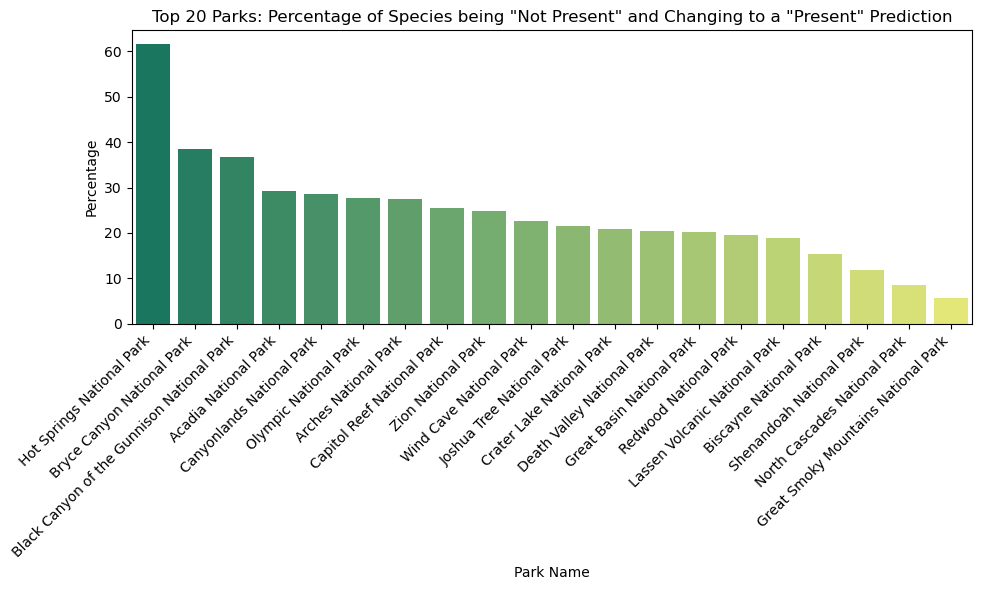

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the 'percentage_change' DataFrame
# Count the occurrences of 'Present' changing to 'Not Present' for each park
park_change_counts = filtered_df_not_present_to_present['Park Name'].value_counts()


# Get the top 10 parks
top_20_parks = park_change_counts.head(20)

# Calculate the percentage of 'Present' changing to 'Not Present' for each park
percentage_change = (top_20_parks / result_df['Park Name'].value_counts().loc[top_20_parks.index] * 100).fillna(0)

# Sort the percentages in descending order
percentage_change = percentage_change.sort_values(ascending=False)

# Use the default Seaborn color palette
palette = sns.color_palette("summer", n_colors=len(percentage_change))

# Plot a bar chart with the default palette
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_change.index, y=percentage_change.values, order=percentage_change.index, palette=palette)
plt.title('Top 20 Parks: Percentage of Species being "Not Present" and Changing to a "Present" Prediction')
plt.xlabel('Park Name')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

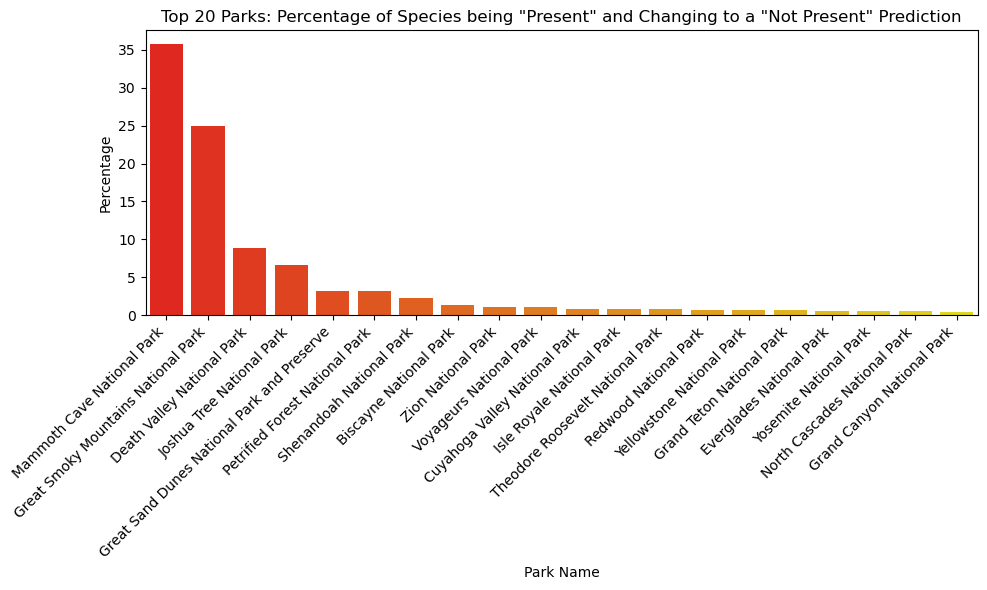

In [15]:
# Count the occurrences of 'Present' changing to 'Not Present' for each park
park_change_counts = filtered_df_present_to_not_present['Park Name'].value_counts()


# Get the top 10 parks
top_20_parks = park_change_counts.head(20)

# Calculate the percentage of 'Present' changing to 'Not Present' for each park
percentage_change = (top_20_parks / result_df['Park Name'].value_counts().loc[top_20_parks.index] * 100).fillna(0)

# Sort the percentages in descending order
percentage_change = percentage_change.sort_values(ascending=False)

palette = sns.color_palette("autumn", n_colors=len(percentage_change))

# Plot a bar chart with the default palette
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_change.index, y=percentage_change.values, order=percentage_change.index, palette=palette)
plt.title('Top 20 Parks: Percentage of Species being "Present" and Changing to a "Not Present" Prediction')
plt.xlabel('Park Name')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

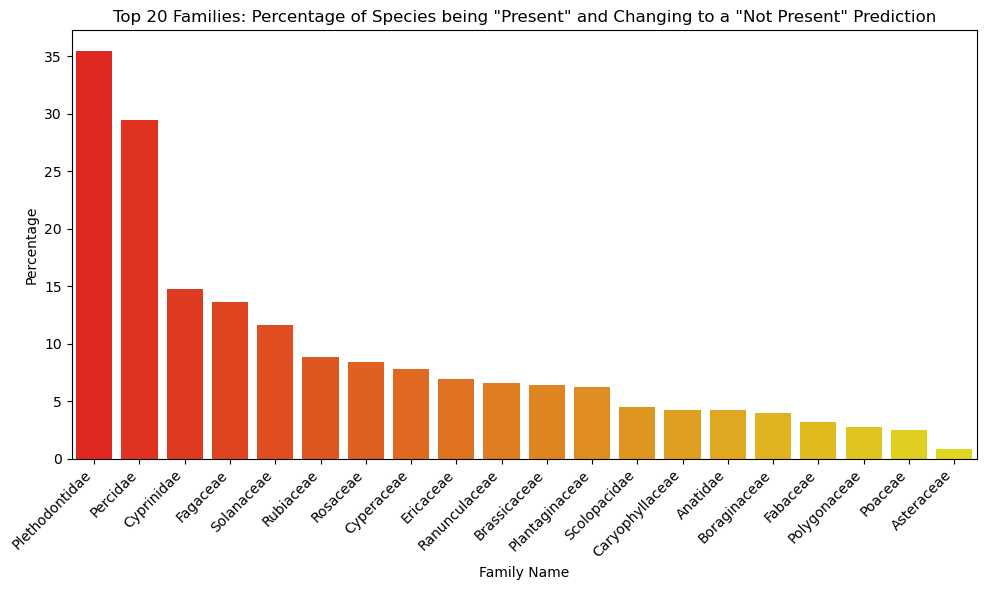

In [16]:
# Count the occurrences of 'Present' changing to 'Not Present' for each park

family_change_counts = filtered_df_present_to_not_present['Family'].value_counts()


# Get the top 10 parks
top_20_family = family_change_counts.head(20)

# Calculate the percentage of 'Present' changing to 'Not Present' for each park
percentage_change = (top_20_family / result_df_without_alaska_and_hawaii['Family'].value_counts().loc[top_20_family.index] * 100).fillna(0)

# Sort the percentages in descending order
percentage_change = percentage_change.sort_values(ascending=False)

palette = sns.color_palette("autumn", n_colors=len(percentage_change))

# Plot a bar chart with the default palette
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_change.index, y=percentage_change.values, order=percentage_change.index, palette=palette)
plt.title('Top 20 Families: Percentage of Species being "Present" and Changing to a "Not Present" Prediction')
plt.xlabel('Family Name')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

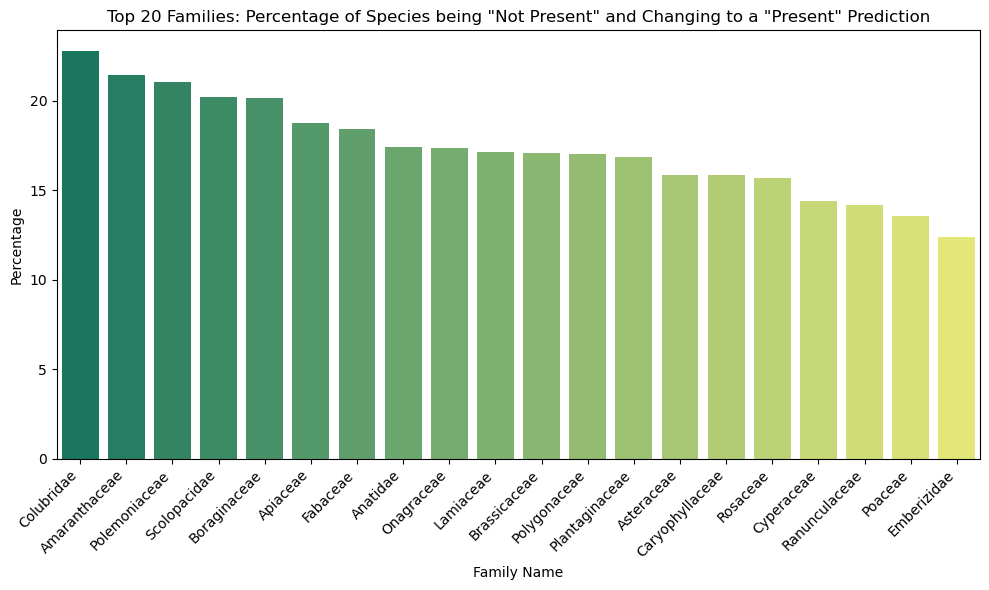

In [17]:
# Count the occurrences of 'Present' changing to 'Not Present' for each park

family_change_counts = filtered_df_not_present_to_present['Family'].value_counts()


# Get the top 10 parks
top_20_family = family_change_counts.head(20)

# Calculate the percentage of 'Present' changing to 'Not Present' for each park
percentage_change = (top_20_family / result_df_without_alaska_and_hawaii['Family'].value_counts().loc[top_20_family.index] * 100).fillna(0)

# Sort the percentages in descending order
percentage_change = percentage_change.sort_values(ascending=False)

palette = sns.color_palette("summer", n_colors=len(percentage_change))

# Plot a bar chart with the default palette
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_change.index, y=percentage_change.values, order=percentage_change.index, palette=palette)
plt.title('Top 20 Families: Percentage of Species being "Not Present" and Changing to a "Present" Prediction')
plt.xlabel('Family Name')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

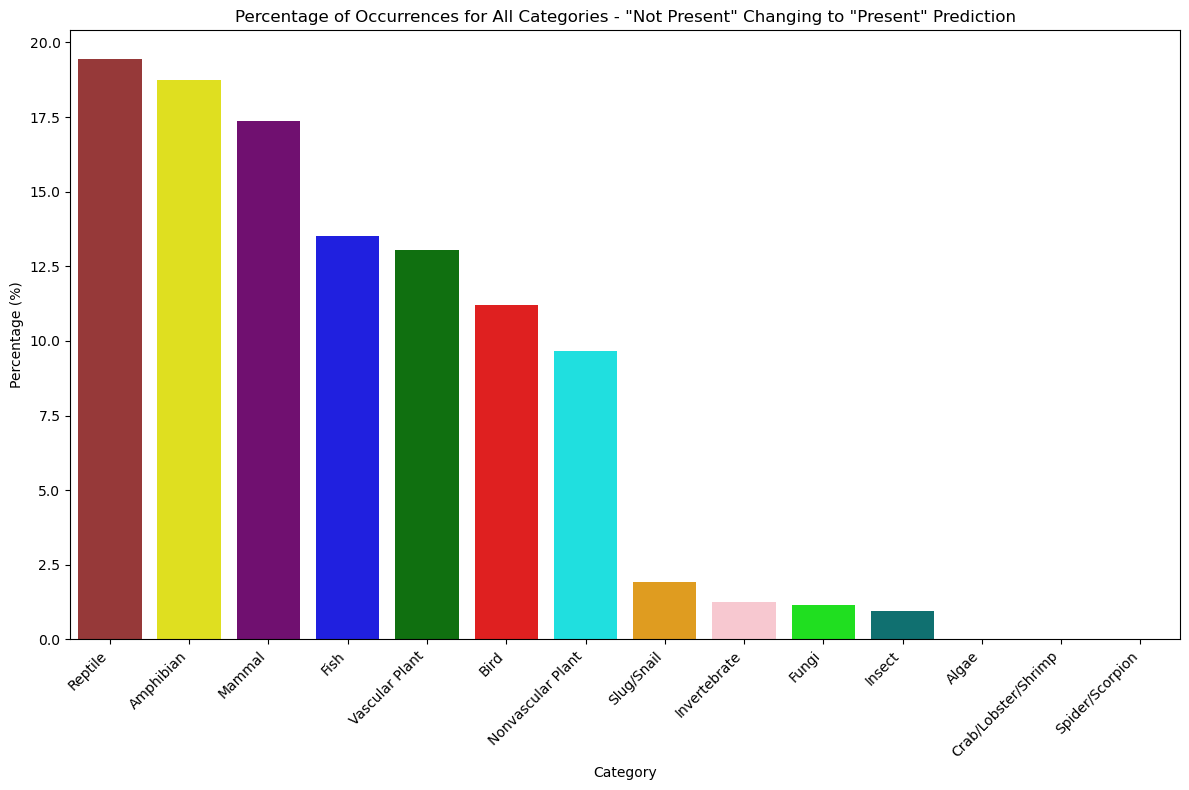

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming result_df is your DataFrame
# and 'Grouped_Occurrence' is the column indicating the grouped occurrence
# and 'Predicted Class' is the column indicating the predicted class
# and 'Category' is the column you want to analyze

# Color dictionary for each category
category_colors = {
    'Fish': 'blue', 'Reptile': 'brown', 'Vascular Plant': 'green',
    'Bird': 'red', 'Amphibian': 'yellow', 'Mammal': 'purple',
    'Nonvascular Plant': 'cyan', 'Slug/Snail': 'orange',
    'Invertebrate': 'pink', 'Fungi': 'lime', 'Insect': 'teal'
}


# Dull the colors using seaborn desaturate function
# Adjust this factor to control the level of dullness

# Count the occurrences of 'Not Present' changing to 'Present' for each category
category_change_counts = filtered_df_not_present_to_present['Category'].value_counts()

# Get the total counts for each category in the entire dataset
total_category_counts = result_df['Category'].value_counts()

# Calculate the percentage of occurrences for each category based on the total counts
percentage_change = (category_change_counts / total_category_counts) * 100

# Sort the percentage_change Series from most to least
percentage_change_sorted = percentage_change.sort_values(ascending=False)

# Plot a bar chart for all categories with instances of "Not Present" changing to "Present" as a percentage
plt.figure(figsize=(12, 8))
sns.barplot(
    x=percentage_change_sorted.index,
    y=percentage_change_sorted.values,
    palette=[category_colors.get(cat, 'gray') for cat in percentage_change_sorted.index]  # Use 'gray' as the default color
)
plt.title('Percentage of Occurrences for All Categories - "Not Present" Changing to "Present" Prediction')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()

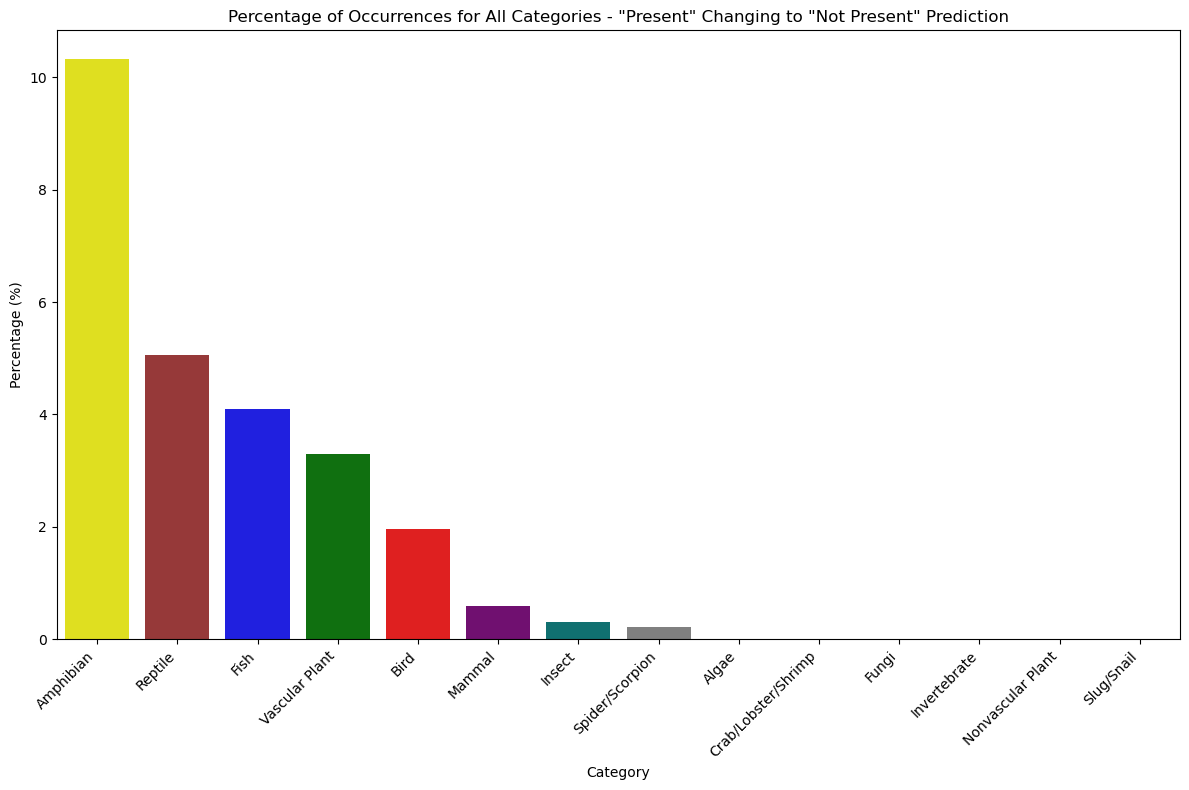

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming result_df is your DataFrame
# and 'Grouped_Occurrence' is the column indicating the grouped occurrence
# and 'Predicted Class' is the column indicating the predicted class
# and 'Category' is the column you want to analyze

# Color dictionary for each category
category_colors = {'Fish': 'blue', 'Reptile': 'brown', 'Vascular Plant': 'green', 'Bird': 'red', 'Amphibian': 'yellow', 'Mammal': 'purple','Insect':'teal'}

# Dull the colors using seaborn desaturate function
dull_factor = 1
# Adjust this factor to control the level of dullness
for category in category_colors:
    category_colors[category] = sns.desaturate(category_colors[category], dull_factor)

# Count the occurrences of 'Not Present' changing to 'Present' for each category
category_change_counts = filtered_df_present_to_not_present['Category'].value_counts()

# Get the total counts for each category in the entire dataset
total_category_counts = result_df['Category'].value_counts()

# Calculate the percentage of occurrences for each category based on the total counts
percentage_change = (category_change_counts / total_category_counts) * 100

# Sort the percentage_change Series from most to least
percentage_change_sorted = percentage_change.sort_values(ascending=False)

# Plot a bar chart for all categories with instances of "Not Present" changing to "Present" as a percentage
plt.figure(figsize=(12, 8))
sns.barplot(
    x=percentage_change_sorted.index,
    y=percentage_change_sorted.values,
    palette=[category_colors.get(cat, 'gray') for cat in percentage_change_sorted.index]  # Use 'gray' as the default color
)
plt.title('Percentage of Occurrences for All Categories - "Present" Changing to "Not Present" Prediction')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()

In [20]:
# List of national parks of interest
parks_of_interest = ['Acadia National Park', 'Big Bend National Park', 'Great Smoky Mountains National Park', 'Shenandoah National Park', 'Yellowstone National Park', 'Yosemite National Park', 'Zion National Park']

# Filter result_df for mammals and specific national parks
filtered_df_mammals_parks_NP = filtered_df_present_to_not_present[
    (filtered_df_present_to_not_present['Category'] == 'Mammal') & (filtered_df_present_to_not_present['Park Name'].isin(parks_of_interest))
]



# Print or use the filtered DataFrame as needed
#print(filtered_df_mammals_parks_NP)

In [21]:
# Assuming Conservation_Endangered_not_present_to_present is your DataFrame
# Create a Styler object
styler = filtered_df_mammals_parks_NP.style

# Apply styling to the relevant columns
styled_df = styler.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey')]}
])

# Save the styled DataFrame as an HTML file
#styled_df.to_html('Mammal_Parks_in_lit_NP_to_P_updated.html', render_links=True)

In [22]:
filtered_df_mammals_parks_Conservation = filtered_df_mammals_parks.dropna(subset=['Conservation Status'])

# Assuming Conservation_Endangered_not_present_to_present is your DataFrame
# Create a Styler object
styler = filtered_df_mammals_parks_Conservation.style

# Apply styling to the relevant columns
styled_df = styler.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey')]}
])

# Save the styled DataFrame as an HTML file
#styled_df.to_html('Mammal_Parks_Conservation_updated.html', render_links=True)

NameError: name 'filtered_df_mammals_parks' is not defined

In [ ]:
import pandas as pd
from IPython.display import HTML

# Assuming 'filtered_df_not_present_to_present' is your DataFrame
# and 'Grouped_Occurrence' is the column indicating the grouped occurrence

# List of national parks of interest
parks_of_interest = ['Acadia National Park', 'Big Bend National Park', 'Great Smoky Mountains National Park', 'Shenandoah National Park', 'Yellowstone National Park', 'Yosemite National Park', 'Zion National Park']

# Filter DataFrame for mammals and specific national parks
filtered_df_mammals_parks = filtered_df_not_present_to_present[
    (filtered_df_not_present_to_present['Category'] == 'Mammal') & 
    (filtered_df_not_present_to_present['Park Name'].isin(parks_of_interest))
]

# Count the occurrences for each park where species were gained ('Not Present' to 'Present')
species_gained_counts = filtered_df_mammals_parks[filtered_df_mammals_parks['Grouped_Occurrence'] == 'Not Present'].groupby('Park Name').size().reset_index(name='Species gained')

# Count the occurrences for each park where species were lost ('Present' to 'Not Present')
species_lost_counts = filtered_df_mammals_parks_NP[filtered_df_mammals_parks_NP['Grouped_Occurrence'] == 'Present'].groupby('Park Name').size().reset_index(name='Species lost')

# Merge the gained and lost counts based on 'Park Name'
merged_df = pd.merge(species_gained_counts, species_lost_counts, on='Park Name', how='outer').fillna(0)

# Convert counts to integers
merged_df['Species gained'] = merged_df['Species gained'].astype(int)
merged_df['Species lost'] = merged_df['Species lost'].astype(int)


# Apply styling to the relevant columns
merged_df_styled = merged_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey')]}
])

# Set the display format for HTML rendering
pd.set_option('display.float_format', lambda x: f'{int(x)}' if x.is_integer() else f'{x:.0f}')

# Save the styled DataFrame as an HTML file
merged_df_styled.to_html('Mammal_Parks_Species_lost_and_gained.html', render_links=True)

In [ ]:
styler = merged_df_mammals.style

# Apply styling to the relevant columns
styled_df = styler.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey')]}
])

# Set the display format for HTML rendering
pd.set_option('display.float_format', lambda x: f'{int(x)}' if x.is_integer() else f'{x:.0f}')

# Save the styled DataFrame as an HTML file
styled_df.to_html('Mammal_Parks_Species_lost_and_gained.html', render_links=True)

# Reset the display option to its default after saving the HTML file
pd.reset_option('display.float_format')

In [ ]:
Yellow_star_thistle = result_df_without_alaska_and_hawaii[result_df_without_alaska_and_hawaii['Scientific Name'] == 'Centaurea solstitialis']
Yellow_star_thistle_with_location = pd.merge(Yellow_star_thistle, park_data[['Park Name', 'Longitude', 'Latitude']], on='Park Name', how='left')


In [ ]:
import folium
from geopy.distance import geodesic  # Import geodesic from geopy.distance
import pandas as pd

# Assuming Yellow_star_thistle_with_location is your DataFrame with Park Name, Longitude, Latitude, and other relevant columns
# Adjust column names as needed

# Create a map centered at the average latitude and longitude
center_lat = Yellow_star_thistle_with_location['Latitude'].mean()
center_lon = Yellow_star_thistle_with_location['Longitude'].mean()
map_species = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Define colors based on conditions
color_dict = {'present': 'blue', 'not_present_but_predicted': 'red', 'not_present': 'orange'}

# Create separate lists for each category
blue_tags = []
red_tags = []
orange_tags = []

# Iterate over the DataFrame and add markers to the appropriate lists
for index, row in Yellow_star_thistle_with_location.iterrows():
    if row['Grouped_Occurrence'] == 'Present':
        color = color_dict['present']
        blue_tags.append((row['Latitude'], row['Longitude']))
    elif row['Prediction'] == 'Present':
        color = color_dict['not_present_but_predicted']
        red_tags.append((row['Latitude'], row['Longitude']))
    else:
        row['Prediction'== 'Not Present']
        color = color_dict['not_present']
        orange_tags.append((row['Latitude'], row['Longitude']))

    # Create a marker with a popup displaying Park Name
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Park Name']} - {row['Grouped_Occurrence']}",
        icon=folium.Icon(color=color)
    )
    marker.add_to(map_species)

# Connect each red marker to its two closest blue markers with lines
for red_tag in red_tags:
    closest_blue_tags = sorted(blue_tags, key=lambda x: geodesic(red_tag, x).miles)[:2]
    for blue_tag in closest_blue_tags:
        line = folium.PolyLine([red_tag, blue_tag], color='black', weight=1)
        line.add_to(map_species)


legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 200px; height: 200px; 
                 padding: 10px; border: 2px solid grey; z-index: 9999; font-size: 12px;
                 background-color: white; text-align: left;">
     <div><b>Legend</b></div>
     <div style="color: blue;"><i class="fa fa-map-marker fa-2x"></i> Present</div>
     <div style="color: red;"><i class="fa fa-map-marker fa-2x"></i> Not Present but Predicted Present</div>
     <div style="color: orange;"><i class="fa fa-map-marker fa-2x"></i> Not Present</div>
     <div style="margin-top: 10px; color: black;">Lines - Possible movement between Parks</div>
      </div>
     """

# Add the styled legend to the map
map_species.get_root().html.add_child(folium.Element(legend_html))

# Add title
map_species.get_root().html.add_child(folium.Element(f"<h1>Species: White-thistle</h1>"))

# Save the map as an HTML file or display it
#map_species

In [ ]:
Hogs = result_df_without_alaska_and_hawaii[result_df_without_alaska_and_hawaii['Scientific Name'] == 'Sus scrofa']
Hogs_with_location = pd.merge(Hogs, park_data[['Park Name', 'Longitude', 'Latitude']], on='Park Name', how='left')

In [ ]:
import folium
from geopy.distance import geodesic  # Import geodesic from geopy.distance
import pandas as pd

# Assuming Yellow_star_thistle_with_location is your DataFrame with Park Name, Longitude, Latitude, and other relevant columns
# Adjust column names as needed

# Create a map centered at the average latitude and longitude
center_lat = Hogs_with_location['Latitude'].mean()
center_lon = Hogs_with_location['Longitude'].mean()
map_species = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Define colors based on conditions
color_dict = {'present': 'blue', 'not_present_but_predicted': 'red', 'not_present': 'orange'}

# Create separate lists for each category
blue_tags = []
red_tags = []
orange_tags = []

# Iterate over the DataFrame and add markers to the appropriate lists
for index, row in Hogs_with_location.iterrows():
    if row['Grouped_Occurrence'] == 'Present':
        color = color_dict['present']
        blue_tags.append((row['Latitude'], row['Longitude']))
    elif row['Prediction'] == 'Present':
        color = color_dict['not_present_but_predicted']
        red_tags.append((row['Latitude'], row['Longitude']))
    else:
        color = color_dict['not_present']
        orange_tags.append((row['Latitude'], row['Longitude']))

    # Create a marker with a popup displaying Park Name
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Park Name']} - {row['Grouped_Occurrence']}",
        icon=folium.Icon(color=color)
    )
    marker.add_to(map_species)

# Connect each red marker to its two closest blue markers with lines
for red_tag in red_tags:
    closest_blue_tags = sorted(blue_tags, key=lambda x: geodesic(red_tag, x).miles)[:2]
    for blue_tag in closest_blue_tags:
        line = folium.PolyLine([red_tag, blue_tag], color='black', weight=1)
        line.add_to(map_species)


legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 200px; height: 200px; 
                 padding: 10px; border: 2px solid grey; z-index: 9999; font-size: 12px;
                 background-color: white; text-align: left;">
     <div><b>Legend</b></div>
     <div style="color: blue;"><i class="fa fa-map-marker fa-2x"></i> Present</div>
     <div style="color: red;"><i class="fa fa-map-marker fa-2x"></i> Not Present but Predicted Present</div>
     <div style="color: orange;"><i class="fa fa-map-marker fa-2x"></i> Not Present</div>
     <div style="margin-top: 10px; color: black;">Lines - Possible movement between Parks</div>
      </div>
     """

# Add the styled legend to the map
map_species.get_root().html.add_child(folium.Element(legend_html))

# Add title
map_species.get_root().html.add_child(folium.Element(f"<h1>Species: Hog</h1>"))

# Save the map as an HTML file or display it
#map_species

In [ ]:
Wolves_df = result_df_without_alaska_and_hawaii[result_df_without_alaska_and_hawaii['Scientific Name'] == 'Canis lupus']
Wolves_df_with_location = pd.merge(Wolves_df, park_data[['Park Name', 'Longitude', 'Latitude']], on='Park Name', how='left')
import folium
from geopy.distance import geodesic  # Import geodesic from geopy.distance
import pandas as pd

# Assuming Yellow_star_thistle_with_location is your DataFrame with Park Name, Longitude, Latitude, and other relevant columns
# Adjust column names as needed
import folium
from geopy.distance import geodesic  # Import geodesic from geopy.distance
import pandas as pd

# Assuming Wolves_df_with_location is your DataFrame with Park Name, Longitude, Latitude, and other relevant columns
# Adjust column names as needed

# Create a map centered at the average latitude and longitude
center_lat = Wolves_df_with_location['Latitude'].mean()
center_lon = Wolves_df_with_location['Longitude'].mean()
map_species = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Define colors based on conditions
color_dict = {'present': 'blue', 'not_present_but_predicted': 'green', 'not_present': 'orange'}

# Create separate lists for each category
blue_tags = []
green_tags = []
orange_tags = []

# Iterate over the DataFrame and add markers to the appropriate lists
for index, row in Wolves_df_with_location.iterrows():
    if row['Grouped_Occurrence'] == 'Present':
        color = color_dict['present']
        blue_tags.append((row['Latitude'], row['Longitude']))
    elif row['Prediction'] == 'Present':
        color = color_dict['not_present_but_predicted']
        green_tags.append((row['Latitude'], row['Longitude']))  # Fix: Append to green_tags instead of red_tags
    else:
        color = color_dict['not_present']
        orange_tags.append((row['Latitude'], row['Longitude']))

    # Create a marker with a popup displaying Park Name
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Park Name']} - {row['Grouped_Occurrence']}",
        icon=folium.Icon(color=color)
    )
    marker.add_to(map_species)

# Connect each blue marker to its two closest green markers with lines
for blue_tag in blue_tags:
    closest_green_tags = sorted(green_tags, key=lambda x: geodesic(blue_tag, x).miles)[:2]
    for green_tag in closest_green_tags:
        line = folium.PolyLine([blue_tag, green_tag], color='black', weight=1)  # Fix: Connect blue_tag to green_tag
        line.add_to(map_species)

#Adding Legend
legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 200px; height: 200px; 
                 padding: 10px; border: 2px solid grey; z-index: 9999; font-size: 12px;
                 background-color: white; text-align: left;">
     <div><b>Legend</b></div>
     <div style="color: blue;"><i class="fa fa-map-marker fa-2x"></i> Present</div>
     <div style="color: green;"><i class="fa fa-map-marker fa-2x"></i> Not Present but Predicted Present</div>
     <div style="color: orange;"><i class="fa fa-map-marker fa-2x"></i> Not Present</div>
     <div style="margin-top: 10px; color: black;">Lines - Possible movement between Parks</div>
      </div>
     """

# Add the styled legend to the map
map_species.get_root().html.add_child(folium.Element(legend_html))

# Add title
map_species.get_root().html.add_child(folium.Element(f"<h1>Species: Wolves</h1>"))
# Save the map as an HTML file or display it
map_species


In [1]:
import folium
import pandas as pd

# Load park data from park.csv
park_data = pd.read_csv('parks.csv')

# Create a map centered around the US
map_us = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles='OpenStreetMap')

# Add markers for each park without clustering
for index, row in park_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Park Name'],
        icon=folium.Icon(color='green', icon='tree', prefix='fa')  # Custom marker with tree icon
    ).add_to(map_us)

# Save the map to an HTML file
map_us.save('US_national_park_final_map_NC.html')

/Users/jacksonschreyer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jacksonschreyer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
